In [1]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# data preparation
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_test  = x_test.reshape((10000, 28, 28, 1))

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(28, 28, 1)))

model.add(keras.layers.Conv2D(64, 3, padding='same', 
                              activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, 3, padding='same', 
                              activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
opt = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt, metrics=['accuracy'], 
              loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, batch_size=256, 
                    validation_data=(x_test, y_test), 
                    epochs=100, verbose=1)

11501568/11490434 [==============================] - 1s 0us/step


2022-01-26 10:44:10.716423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 10:44:10.719996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 10:44:10.720257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 10:44:10.720641: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                6

2022-01-26 10:44:12.028749: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-01-26 10:44:13.055262: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


235/235 [==============================] - 4s 7ms/step - loss: 2.3104 - accuracy: 0.1050 - val_loss: 2.3003 - val_accuracy: 0.1028
Epoch 2/100
235/235 [==============================] - 2s 6ms/step - loss: 2.2845 - accuracy: 0.1394 - val_loss: 2.2493 - val_accuracy: 0.1656
Epoch 3/100
235/235 [==============================] - 2s 6ms/step - loss: 2.1223 - accuracy: 0.3751 - val_loss: 1.8711 - val_accuracy: 0.6364
Epoch 4/100
235/235 [==============================] - 2s 6ms/step - loss: 1.4229 - accuracy: 0.6920 - val_loss: 0.9871 - val_accuracy: 0.7708
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.8002 - accuracy: 0.8001 - val_loss: 0.6427 - val_accuracy: 0.8333
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.5850 - accuracy: 0.8421 - val_loss: 0.5046 - val_accuracy: 0.8659
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.4864 - accuracy: 0.8655 - val_loss: 0.4368 - val_accuracy: 0.8772
Epoch 8/100

235/235 [==============================] - 2s 7ms/step - loss: 0.0541 - accuracy: 0.9845 - val_loss: 0.0548 - val_accuracy: 0.9829
Epoch 59/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0534 - accuracy: 0.9845 - val_loss: 0.0552 - val_accuracy: 0.9817
Epoch 60/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0519 - accuracy: 0.9849 - val_loss: 0.0512 - val_accuracy: 0.9834
Epoch 61/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0513 - accuracy: 0.9853 - val_loss: 0.0526 - val_accuracy: 0.9838
Epoch 62/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0507 - accuracy: 0.9852 - val_loss: 0.0507 - val_accuracy: 0.9839
Epoch 63/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0500 - accuracy: 0.9855 - val_loss: 0.0501 - val_accuracy: 0.9837
Epoch 64/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0495 - accuracy: 0.9859 - val_loss: 0.0490 - val_accuracy: 0.9835
Epoch

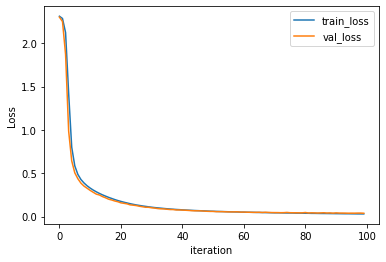

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

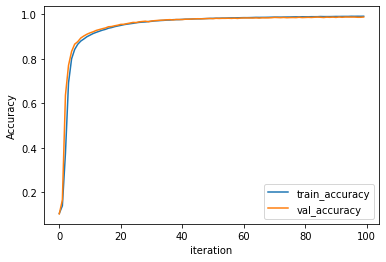

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()